# Actividad 3: Análisis de Sentimientos con VADER
Notebook: NLP_Ejercicios_Taller_TFIDF_Analisis_Sentimiento.ipynb

**Instrucciónes:**

Ejecutar el bloque de análisis de sentimientos.
Reemplazar las frases originales por 5 frases nuevas etiquetadas por el grupo:
1.	2 positivas
2.	2 negativas
3.	1 neutral


Idx | Compound | Predicción | Etiqueta Real | Reseña
--------------------------------------------------------------------------------------------------------------
  1 |   0.0000 |  Neutral   |   Positivo   | La cafetera entrega un sabor excelente y es muy fácil de usar.
  2 |   0.0000 |  Neutral   |   Positivo   | El servicio técnico fue rápido y resolvió todo a la primera.
  3 |   0.0000 |  Neutral   |   Negativo   | El envío llegó tarde y el empaque estaba dañado.
  4 |  -0.2960 |  Negativo  |   Negativo   | La interfaz es confusa y el manual no ayuda en nada.
  5 |   0.0000 |  Neutral   |   Neutral    | El producto cumple con lo prometido.

Matriz de confusión (orden: Positivo, Neutral, Negativo):
[[0 2 0]
 [0 1 0]
 [0 1 1]]

Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo      1.000     0.500     0.667         2
     Neutral      0.250     1.000     0.400         1
    Positivo      0.000     0.000     0.000         2

    accuracy    

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

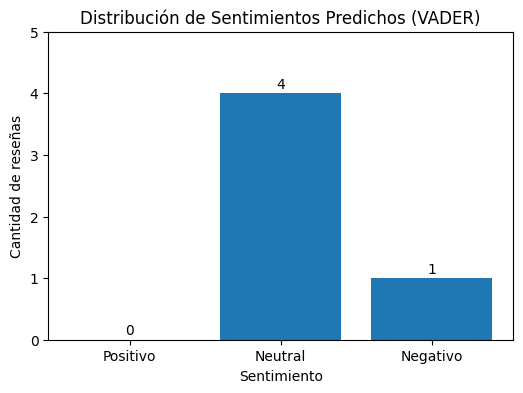

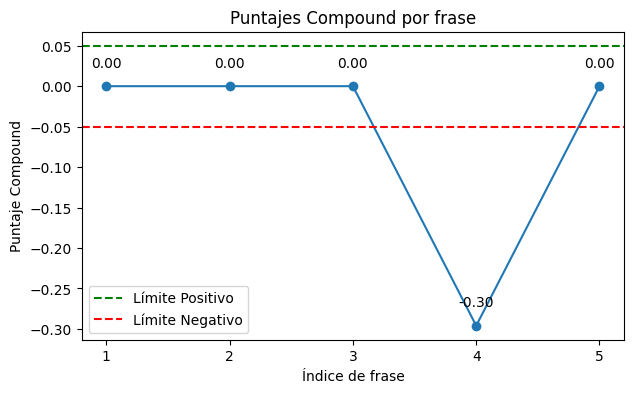

In [3]:
# =========================================
# Actividad 3: Análisis de Sentimientos con VADER
# Google Colab Ready + Gráficos
# =========================================

# 1) Instalación y recursos necesarios
!pip install -q nltk scikit-learn

import nltk
nltk.download('vader_lexicon')

# 2) Importar librerías
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter

# 3) Frases NUEVAS del grupo (2 positivas, 2 negativas, 1 neutral)
data = [
    ("La cafetera entrega un sabor excelente y es muy fácil de usar.", "Positivo"),
    ("El servicio técnico fue rápido y resolvió todo a la primera.", "Positivo"),
    ("El envío llegó tarde y el empaque estaba dañado.", "Negativo"),
    ("La interfaz es confusa y el manual no ayuda en nada.", "Negativo"),
    ("El producto cumple con lo prometido.", "Neutral"),
]

# 4) Inicializar VADER
sia = SentimentIntensityAnalyzer()

# 5) Regla de decisión estándar
def vader_label(compound):
    if compound >= 0.05:
        return "Positivo"
    elif compound <= -0.05:
        return "Negativo"
    else:
        return "Neutral"

# 6) Procesar y mostrar resultados
resultados = []
print("Idx | Compound | Predicción | Etiqueta Real | Reseña")
print("-"*110)
for i, (texto, etiqueta_real) in enumerate(data, start=1):
    score = sia.polarity_scores(texto)["compound"]
    pred = vader_label(score)
    resultados.append((texto, score, pred, etiqueta_real))
    print(f"{i:>3} | {score:>8.4f} | {pred:^10} | {etiqueta_real:^12} | {texto}")

# 7) Métricas de rendimiento
y_true = [et for _, _, _, et in resultados]
y_pred = [pr for _, _, pr, _ in resultados]

print("\nMatriz de confusión (orden: Positivo, Neutral, Negativo):")
print(confusion_matrix(y_true, y_pred, labels=["Positivo","Neutral","Negativo"]))

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred, digits=3))

# 8) Gráfico de barras: distribución de sentimientos predichos
conteo = Counter(y_pred)
orden = ["Positivo", "Neutral", "Negativo"]  # orden fijo
valores = [conteo.get(lbl, 0) for lbl in orden]

plt.figure(figsize=(6,4))
plt.bar(orden, valores)
plt.title("Distribución de Sentimientos Predichos (VADER)")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de reseñas")
for i, v in enumerate(valores):
    plt.text(i, v + 0.03, str(v), ha='center', va='bottom')
plt.ylim(0, max(valores)+1)
plt.show()

# 9) Gráfico de línea: puntajes compound por frase
compounds = [score for _, score, _, _ in resultados]
indices = list(range(1, len(compounds)+1))

plt.figure(figsize=(7,4))
plt.plot(indices, compounds, marker='o', linestyle='-')
plt.axhline(y=0.05, color='green', linestyle='--', label='Límite Positivo')
plt.axhline(y=-0.05, color='red', linestyle='--', label='Límite Negativo')
plt.title("Puntajes Compound por frase")
plt.xlabel("Índice de frase")
plt.ylabel("Puntaje Compound")
plt.xticks(indices)
for i, val in enumerate(compounds):
    plt.text(indices[i], val + 0.02, f"{val:.2f}", ha='center', va='bottom')
plt.legend()
plt.show()

